<IPython.core.display.Javascript object>


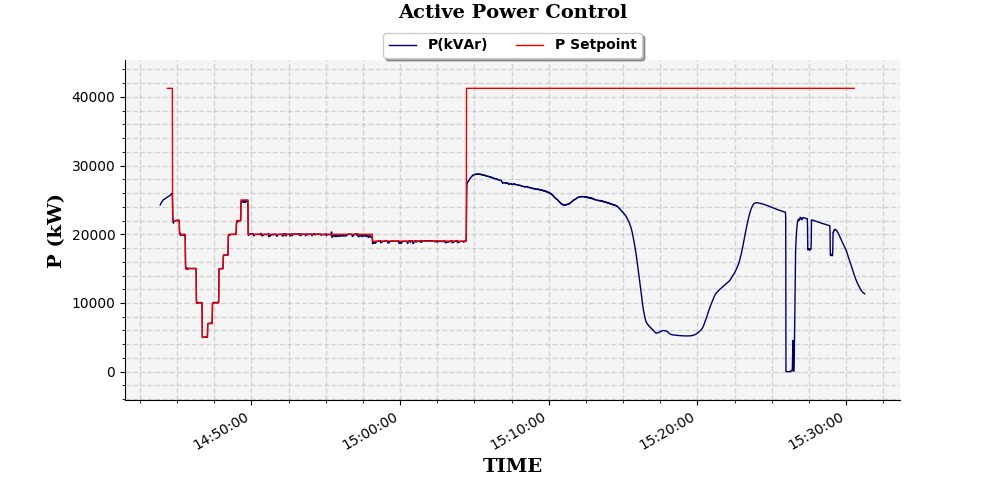

In [3]:
%matplotlib notebook
import plot_maplot_v1
data = plot_maplot_v1.get_data_from_csv("minh_internal.csv")
(time,m,s,en)=plot_maplot_v1.get_traces(data)
plot_maplot_v1.plot_P(time,m['P'],s['P'],en['P'],0)

<IPython.core.display.Javascript object>


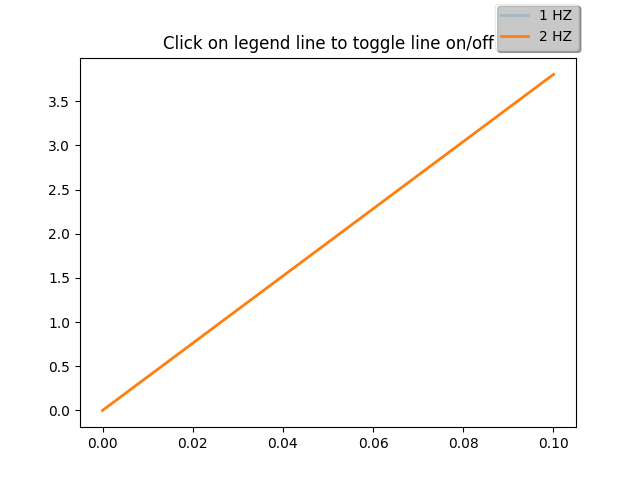

In [17]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0.0, 0.2, 0.1)
y1 = 2*np.sin(2*np.pi*t)
y2 = 4*np.sin(2*np.pi*2*t)

fig, ax = plt.subplots()
ax.set_title('Click on legend line to toggle line on/off')
line1, = ax.plot(t, y1, lw=2, label='1 HZ')
line2, = ax.plot(t, y2, lw=2, label='2 HZ')
leg = ax.legend(loc='upper left', fancybox=True, shadow=True)
leg.get_frame().set_alpha(0.4)
leg.set_draggable(True)

# we will set up a dict mapping legend line to orig line, and enable
# picking on the legend line
lines = [line1, line2]
lined = dict()
for legline, origline in zip(leg.get_lines(), lines):
    legline.set_picker(5)  # 5 pts tolerance
    lined[legline] = origline


def onpick(event):
    # on the pick event, find the orig line corresponding to the
    # legend proxy line, and toggle the visibility
    legline = event.artist
    origline = lined[legline]
    vis = not origline.get_visible()
    origline.set_visible(vis)
    # Change the alpha on the line in the legend so we can see what lines
    # have been toggled
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    fig.canvas.draw()

fig.canvas.mpl_connect('pick_event', onpick)

plt.show()

In [34]:
def plot_AVR(TIME,V,AVRSP,Q,AVREN,AVRDB):
    %matplotlib notebook
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates
    from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter

    
    measurement1= (0,0,104/256)
    measurement2= (62/256,150/256,81/256)
    setpoint1= (234/256,0,0)
    setpoint2 = (250/256,150/256,0)
    
    font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        }

    legend_font = {'weight': 'bold',
                  'size':10}

    ticks_font = {'fontsize':8,
                 'fontweight':'bold'}
    

#     #Setpoint only when control is enabled
    AVRSP_copy = AVRSP.copy()
    AVRSP_copy[AVREN==0]=np.NaN

#     #Creat Figure

    fig, ax = plt.subplots(figsize=(10,5))
    ax2=ax.twinx()
    #Plot Measurement
    l1=ax.plot(TIME,V,label='V(V)',color=measurement1,linewidth=0.5)
    l2=ax2.plot(TIME,Q,label='Q(kVAr)',color=measurement2,linewidth=2)
    #Plot Setpoints
    l3=ax.plot(TIME,AVRSP_copy,label='AVR Setpoint',color=setpoint1,linewidth=0.5)
    lb=ax.fill_between(TIME.values,AVRSP_copy-AVRDB,AVRSP_copy+AVRDB,alpha=0.7,facecolor=l3[0].get_color())
#     l4=ax2.plot(TIME,FSP,label='F Setpoint',color=setpoint2,linewidth=2)
    #Formatting axis
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax2.spines["top"].set_visible(False)
   
    ax.set_facecolor('whitesmoke')
    ax.grid(which='both',ls='--',lw=1,alpha=0.5)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    ax.xaxis.set_minor_locator(AutoMinorLocator())        
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax2.yaxis.set_minor_locator(AutoMinorLocator())

    ax.set_ylim((min(V.max(),AVRSP.min()))-1000,max(V.max(),AVRSP.max())+1000)
    ax2.set_ylim(Q.min()*2,Q.max()*2)
    
    lns = l1+l2+l3
    labs = [l.get_label() for l in lns]
    leg = ax.legend(lns,labs,bbox_to_anchor=(0.5, 1.1),loc='upper center',ncol=len(lns),prop=legend_font,
                   fancybox=True, shadow=True)
    fig.autofmt_xdate()
    
    ax.set_xlabel('TIME',fontdict=font)
    ax.set_ylabel('Voltage (V)',fontdict=font)
    ax2.set_ylabel('Q (kVAr)',fontdict=font)
    ax.tick_params(labelsize=10)
    ax.set_title('AVR Control',fontdict=font,x=0.5,y=1.1)
    
    # we will set up a dict mapping legend line to orig line, and enable
    # picking on the legend line
    lines = [l1[0],l2[0],l3[0]]
    lined = dict()
    for legline, origline in zip(leg.get_lines(), lines):
        legline.set_picker(5)  # 5 pts tolerance
        lined[legline] = origline

    def onpick(event):
#         state = fig.canvas.manager.toolbar.toolmanager.active_toggle["default"]
#         print(state)
        # on the pick event, find the orig line corresponding to the
        # legend proxy line, and toggle the visibility
        legline = event.artist
        origline = lined[legline]
        vis = not origline.get_visible()
        if origline == l3[0]:
            vis_b = not lb.get_visible()
            lb.set_visible(vis_b)
        origline.set_visible(vis)
        # Change the alpha on the line in the legend so we can see what lines
        # have been toggled
        if vis:
            legline.set_alpha(1.0)
        else:
            legline.set_alpha(0.2)
        fig.canvas.draw()
    
    fig.canvas.mpl_connect('pick_event', onpick)
    plt.show()
    
    return 

<IPython.core.display.Javascript object>


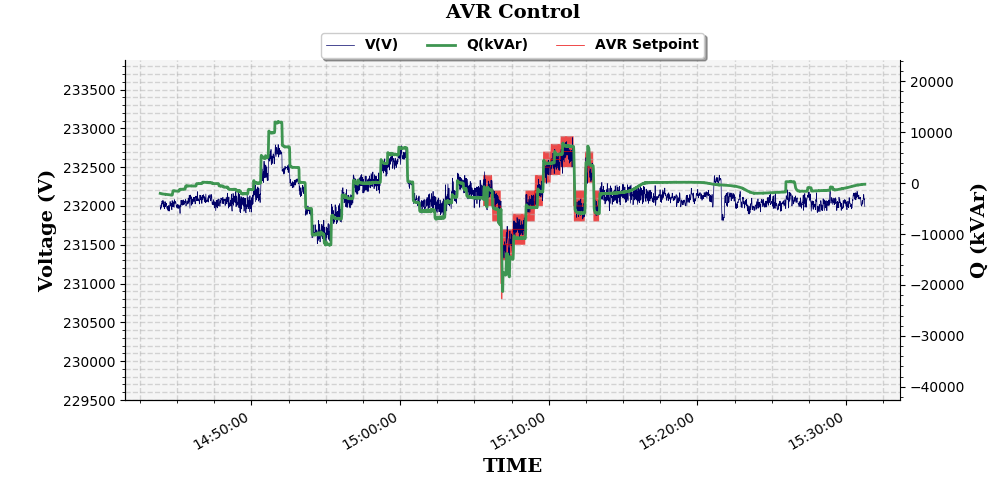

In [35]:
plot_AVR(time,m['V'],s['AVR'],m['Q'],en['AVR'],200)